In [1]:
import numpy as np
import tensorflow as  tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#We are first taking the Data for churn Modelling
data=pd.read_csv('/content/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#We are dropping the columns that are irrelevant such as
#Row Number , CustomerId , Surname
data=data.drop(columns=['RowNumber','CustomerId','Surname'])
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [5]:
#Then we are going to encode the gender in our Dataset
#We took 0 for Male and 1 For the Female
data['Gender']=data['Gender'].apply(lambda x :  0 if x=='Female' else 1)
#Then we take the integer values
data['Gender']=data['Gender'].astype(int)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0


In [6]:
data.tail()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,1,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1
9999,792,France,1,28,4,130142.79,1,1,0,38190.78,0


In [7]:
from sklearn.preprocessing import LabelEncoder
#As we can look from our data that the geography columns has different countries and we want to fit them
#According to out model
label_encoder = LabelEncoder()
#By using Label Encoder we have encoded different Countries and assigned each one a number according to the label
data['Geography']=label_encoder.fit_transform(data['Geography'])
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,2,1,43,2,125510.82,1,1,1,79084.10,0


0    7963
1    2037
Name: Exited, dtype: int64

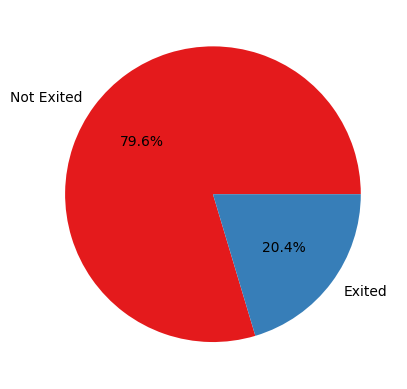

In [9]:
# Here we are plotting a pie graph to see How much of our Customers have exited and how much are still there
value_counts=data['Exited'].value_counts()
plt.pie(value_counts, labels=['Not Exited', 'Exited'], autopct='%1.1f%%', colors=sns.color_palette('Set1'))


value_counts

In [11]:
#As we have calculated the Customers that have exited
#Now our goal is to drop them from our data as they will not be useful for our prediction
X=data.drop('Exited',axis=1)
y=data['Exited']

In [12]:
import numpy as np
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
#Here we are counting the number of zeroes and ones and sampling the distribution class before oversampling
print("Class distribution before oversampling:", Counter(y))
#Then we used Random over sampler
#Object to over-sample the minority class(es) by picking samples at random with replacement. The bootstrap can be generated in a smoothed manner.
ros = RandomOverSampler(random_state=42)

X, y = ros.fit_resample(X, y)

print("Class distribution after oversampling:", Counter(y))

Class distribution before oversampling: Counter({0: 7963, 1: 2037})
Class distribution after oversampling: Counter({1: 7963, 0: 7963})


In [14]:
#Standarizing the data by using (X= X - mean of X)/(standard Deivation of x)
X=np.array(X)
X=(X-X.mean())/X.std()

In [15]:
#Now we are Splitting the training and testing data
from sklearn.model_selection import train_test_split
#Here we took the test size as 30%
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

In [18]:
# XGBoost (Gradient Boosting)
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train, y_train)
xgb_pred = xgb_model.predict(x_test)

print("XGBoost (Gradient Boosting):")
print("Accuracy:", accuracy_score(y_test, xgb_pred))
print("Classification Report:\n", classification_report(y_test, xgb_pred))

XGBoost (Gradient Boosting):
Accuracy: 0.8890749267475931
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.85      0.89      2426
           1       0.86      0.93      0.89      2352

    accuracy                           0.89      4778
   macro avg       0.89      0.89      0.89      4778
weighted avg       0.89      0.89      0.89      4778

